# Second Hand Car Price Prediction

### 1. Importing libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading and Understanding the dataset

In [142]:
df = pd.read_csv(r'C:\Users\ffuckan\Desktop\Data Science\Car Price Prediction\cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [143]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [145]:
df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [146]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


### 3. Data Cleaning

In [147]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [148]:
rows_with_future_year = df[df['Year'] > 2024]
print('Rows with Year greater than 2024:')
print(rows_with_future_year)

Rows with Year greater than 2024:
Empty DataFrame
Columns: [Car_ID, Brand, Model, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []


In [149]:
df = df.drop_duplicates()
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


### 4. Handling Outliers

In [150]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

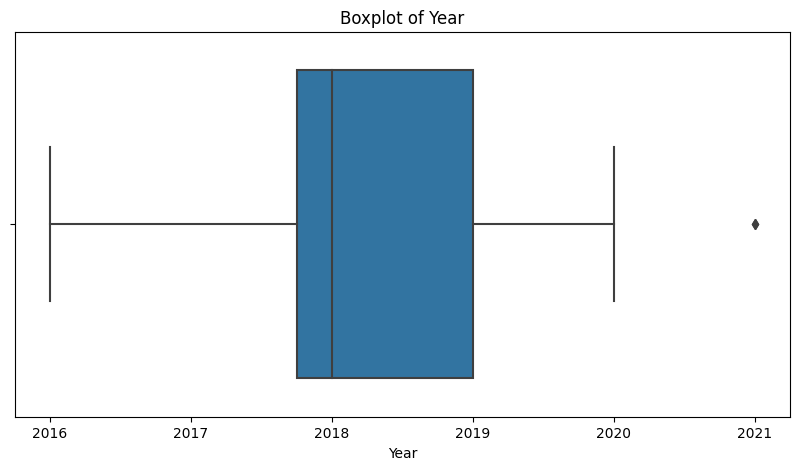

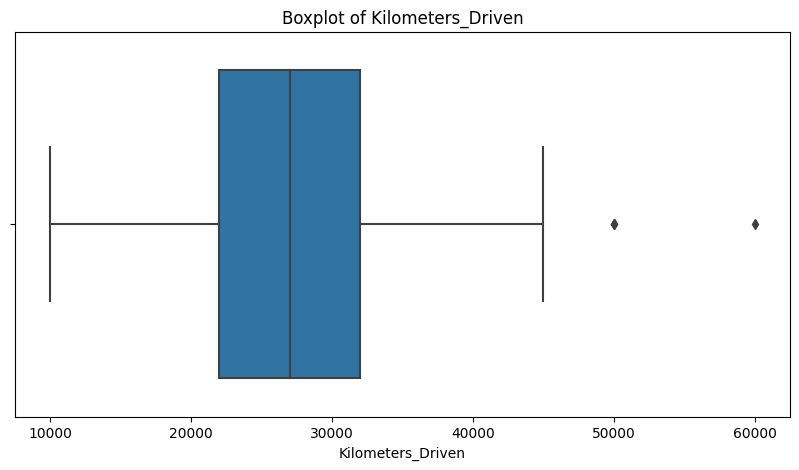

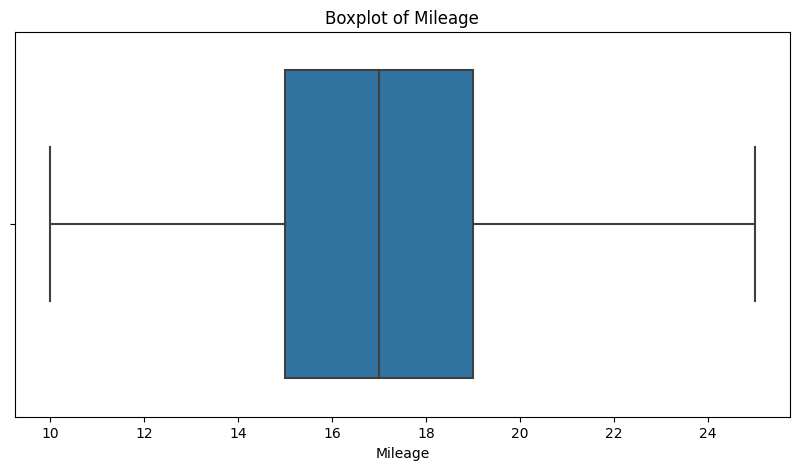

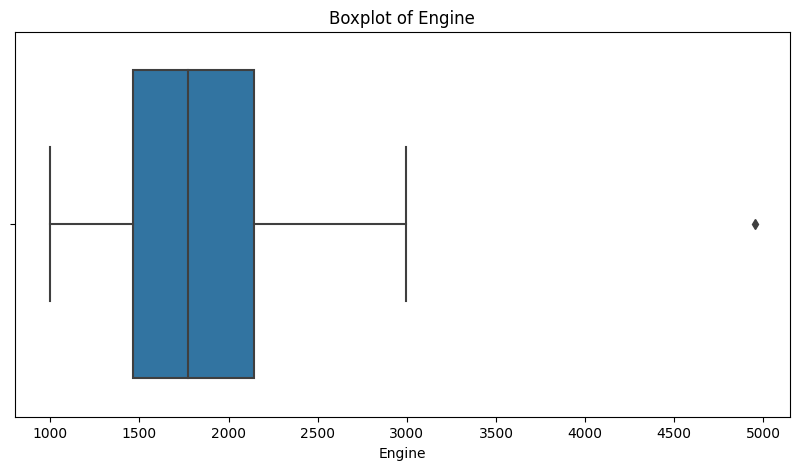

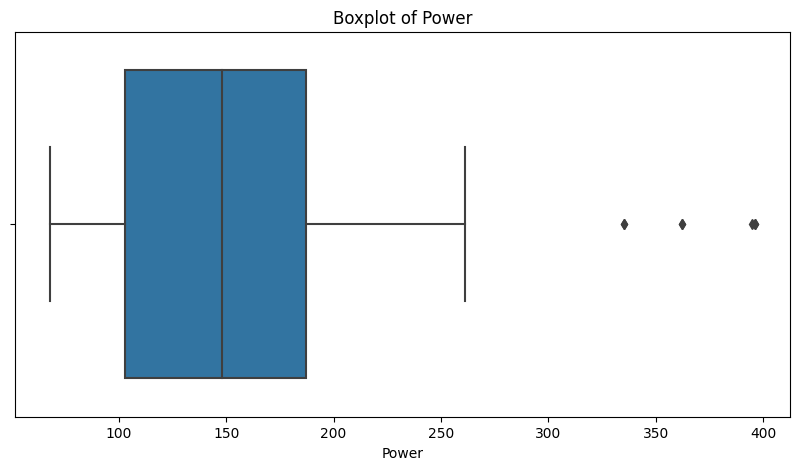

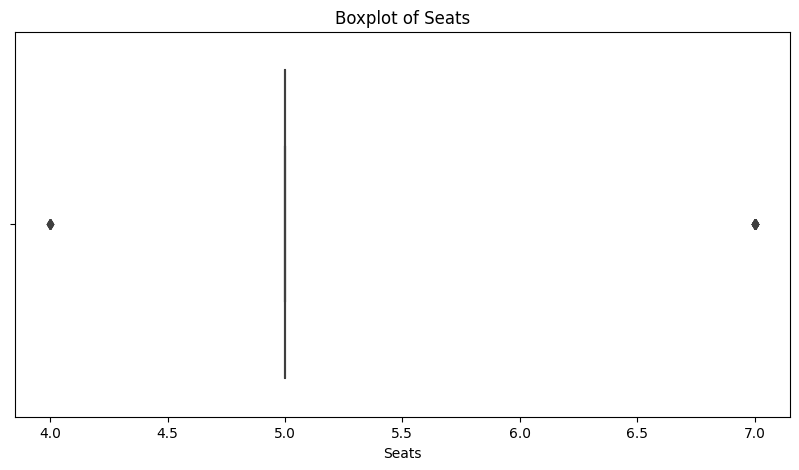

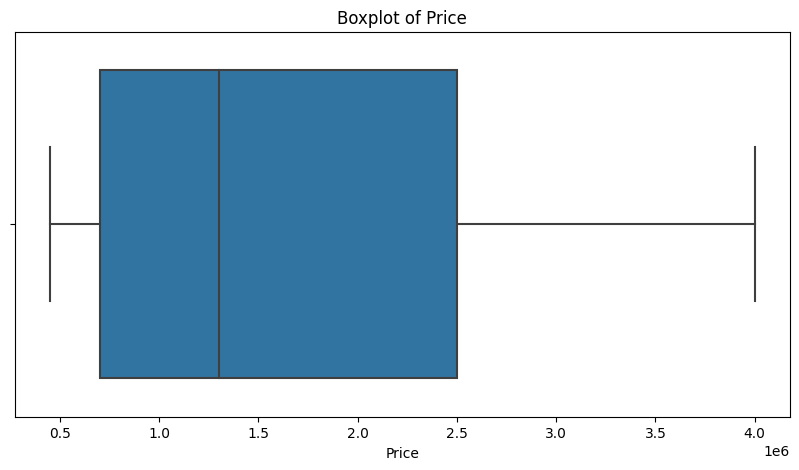

In [151]:
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
for column in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

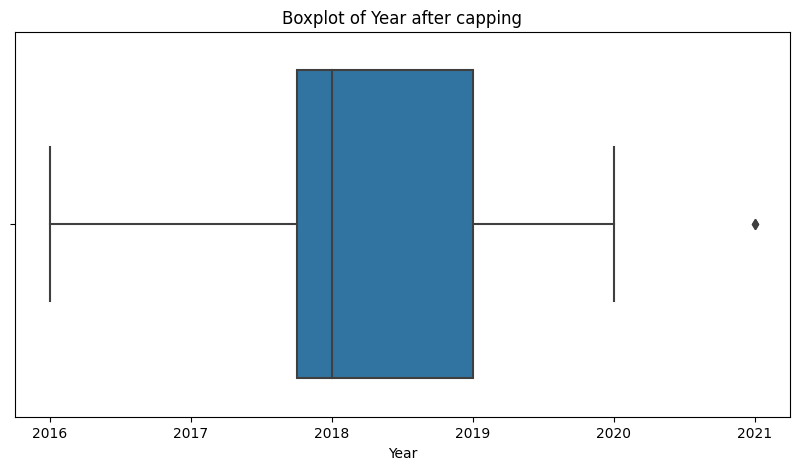

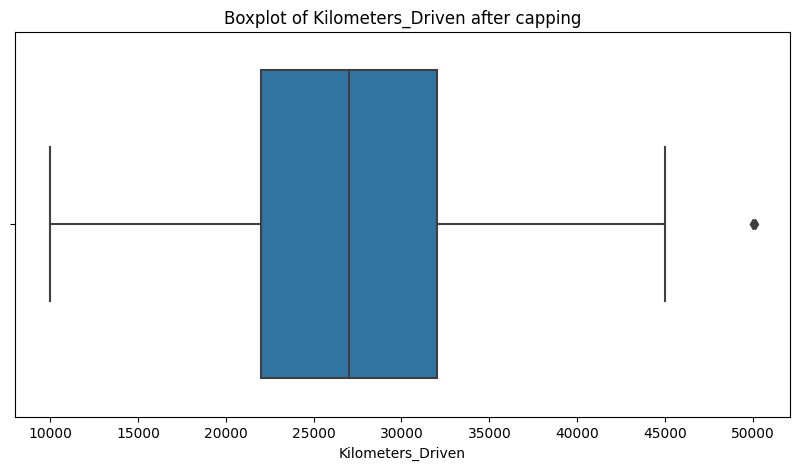

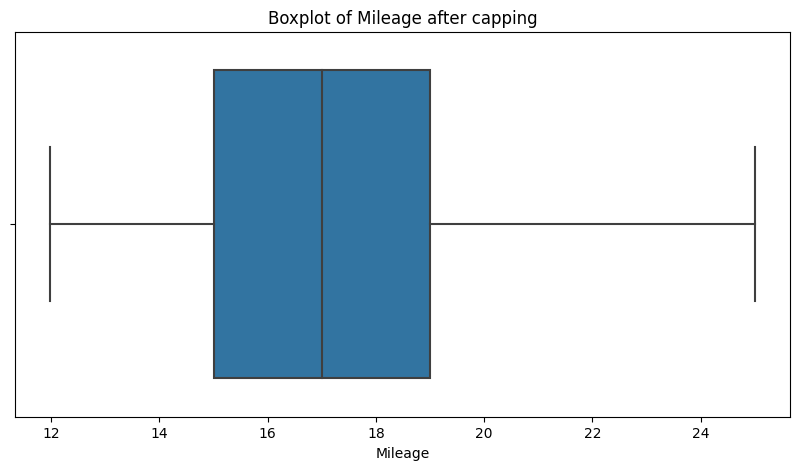

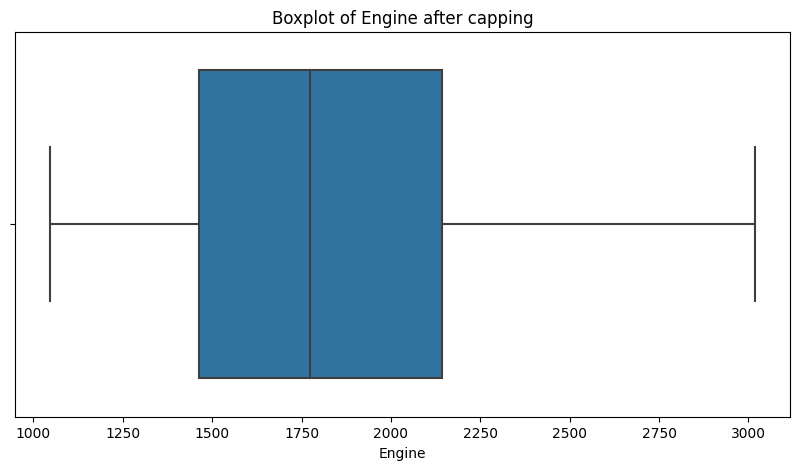

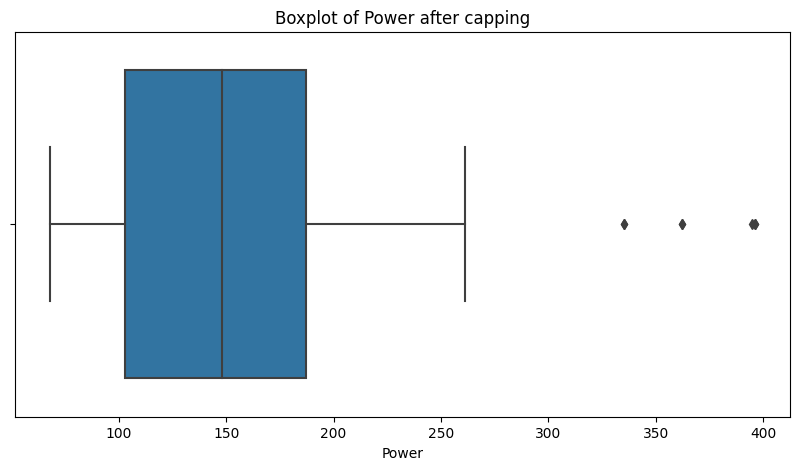

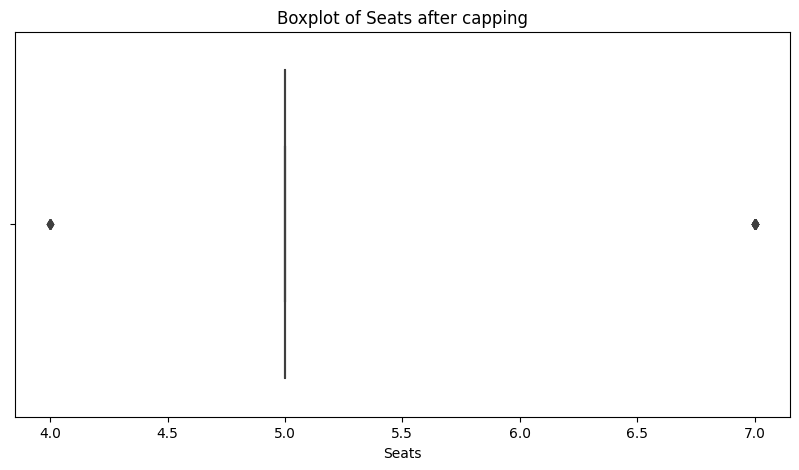

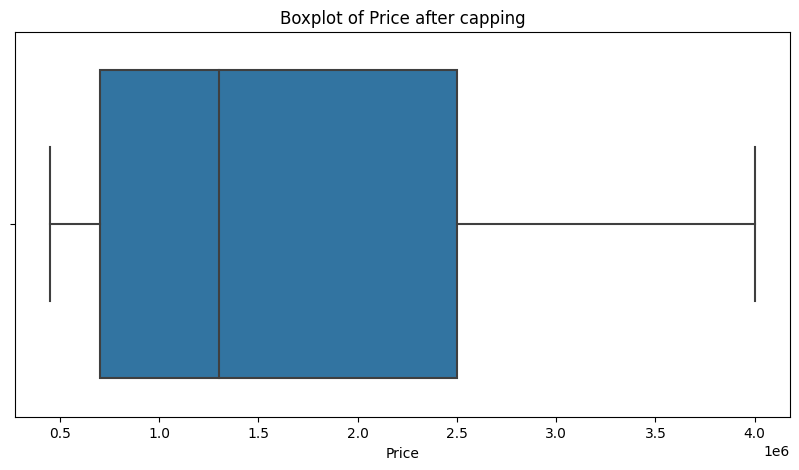

In [152]:
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

for column in numerical_features:
    cap_outliers(df, column)

for column in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot of {column} after capping')
    plt.show()

In [153]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018.0,50000.0,Petrol,Manual,First,15.00,1498.00,108.0,5.0,800000.0
1,2,Honda,Civic,2019.0,40000.0,Petrol,Automatic,Second,17.00,1597.00,140.0,5.0,1000000.0
2,3,Ford,Mustang,2017.0,20000.0,Petrol,Automatic,First,11.98,3017.53,395.0,4.0,2500000.0
3,4,Maruti,Swift,2020.0,30000.0,Diesel,Manual,Third,23.00,1248.00,74.0,5.0,600000.0
4,5,Hyundai,Sonata,2016.0,50100.0,Diesel,Automatic,Second,18.00,1999.00,194.0,5.0,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019.0,22000.0,Diesel,Automatic,First,16.00,1950.00,191.0,5.0,2900000.0
96,97,Toyota,Innova Crysta,2017.0,38000.0,Diesel,Manual,Second,13.00,2755.00,171.0,7.0,1400000.0
97,98,Ford,EcoSport,2018.0,26000.0,Petrol,Manual,Third,18.00,1497.00,121.0,5.0,750000.0
98,99,Hyundai,Verna,2019.0,24000.0,Petrol,Automatic,Second,17.00,1497.00,113.0,5.0,850000.0


### 5. EDA

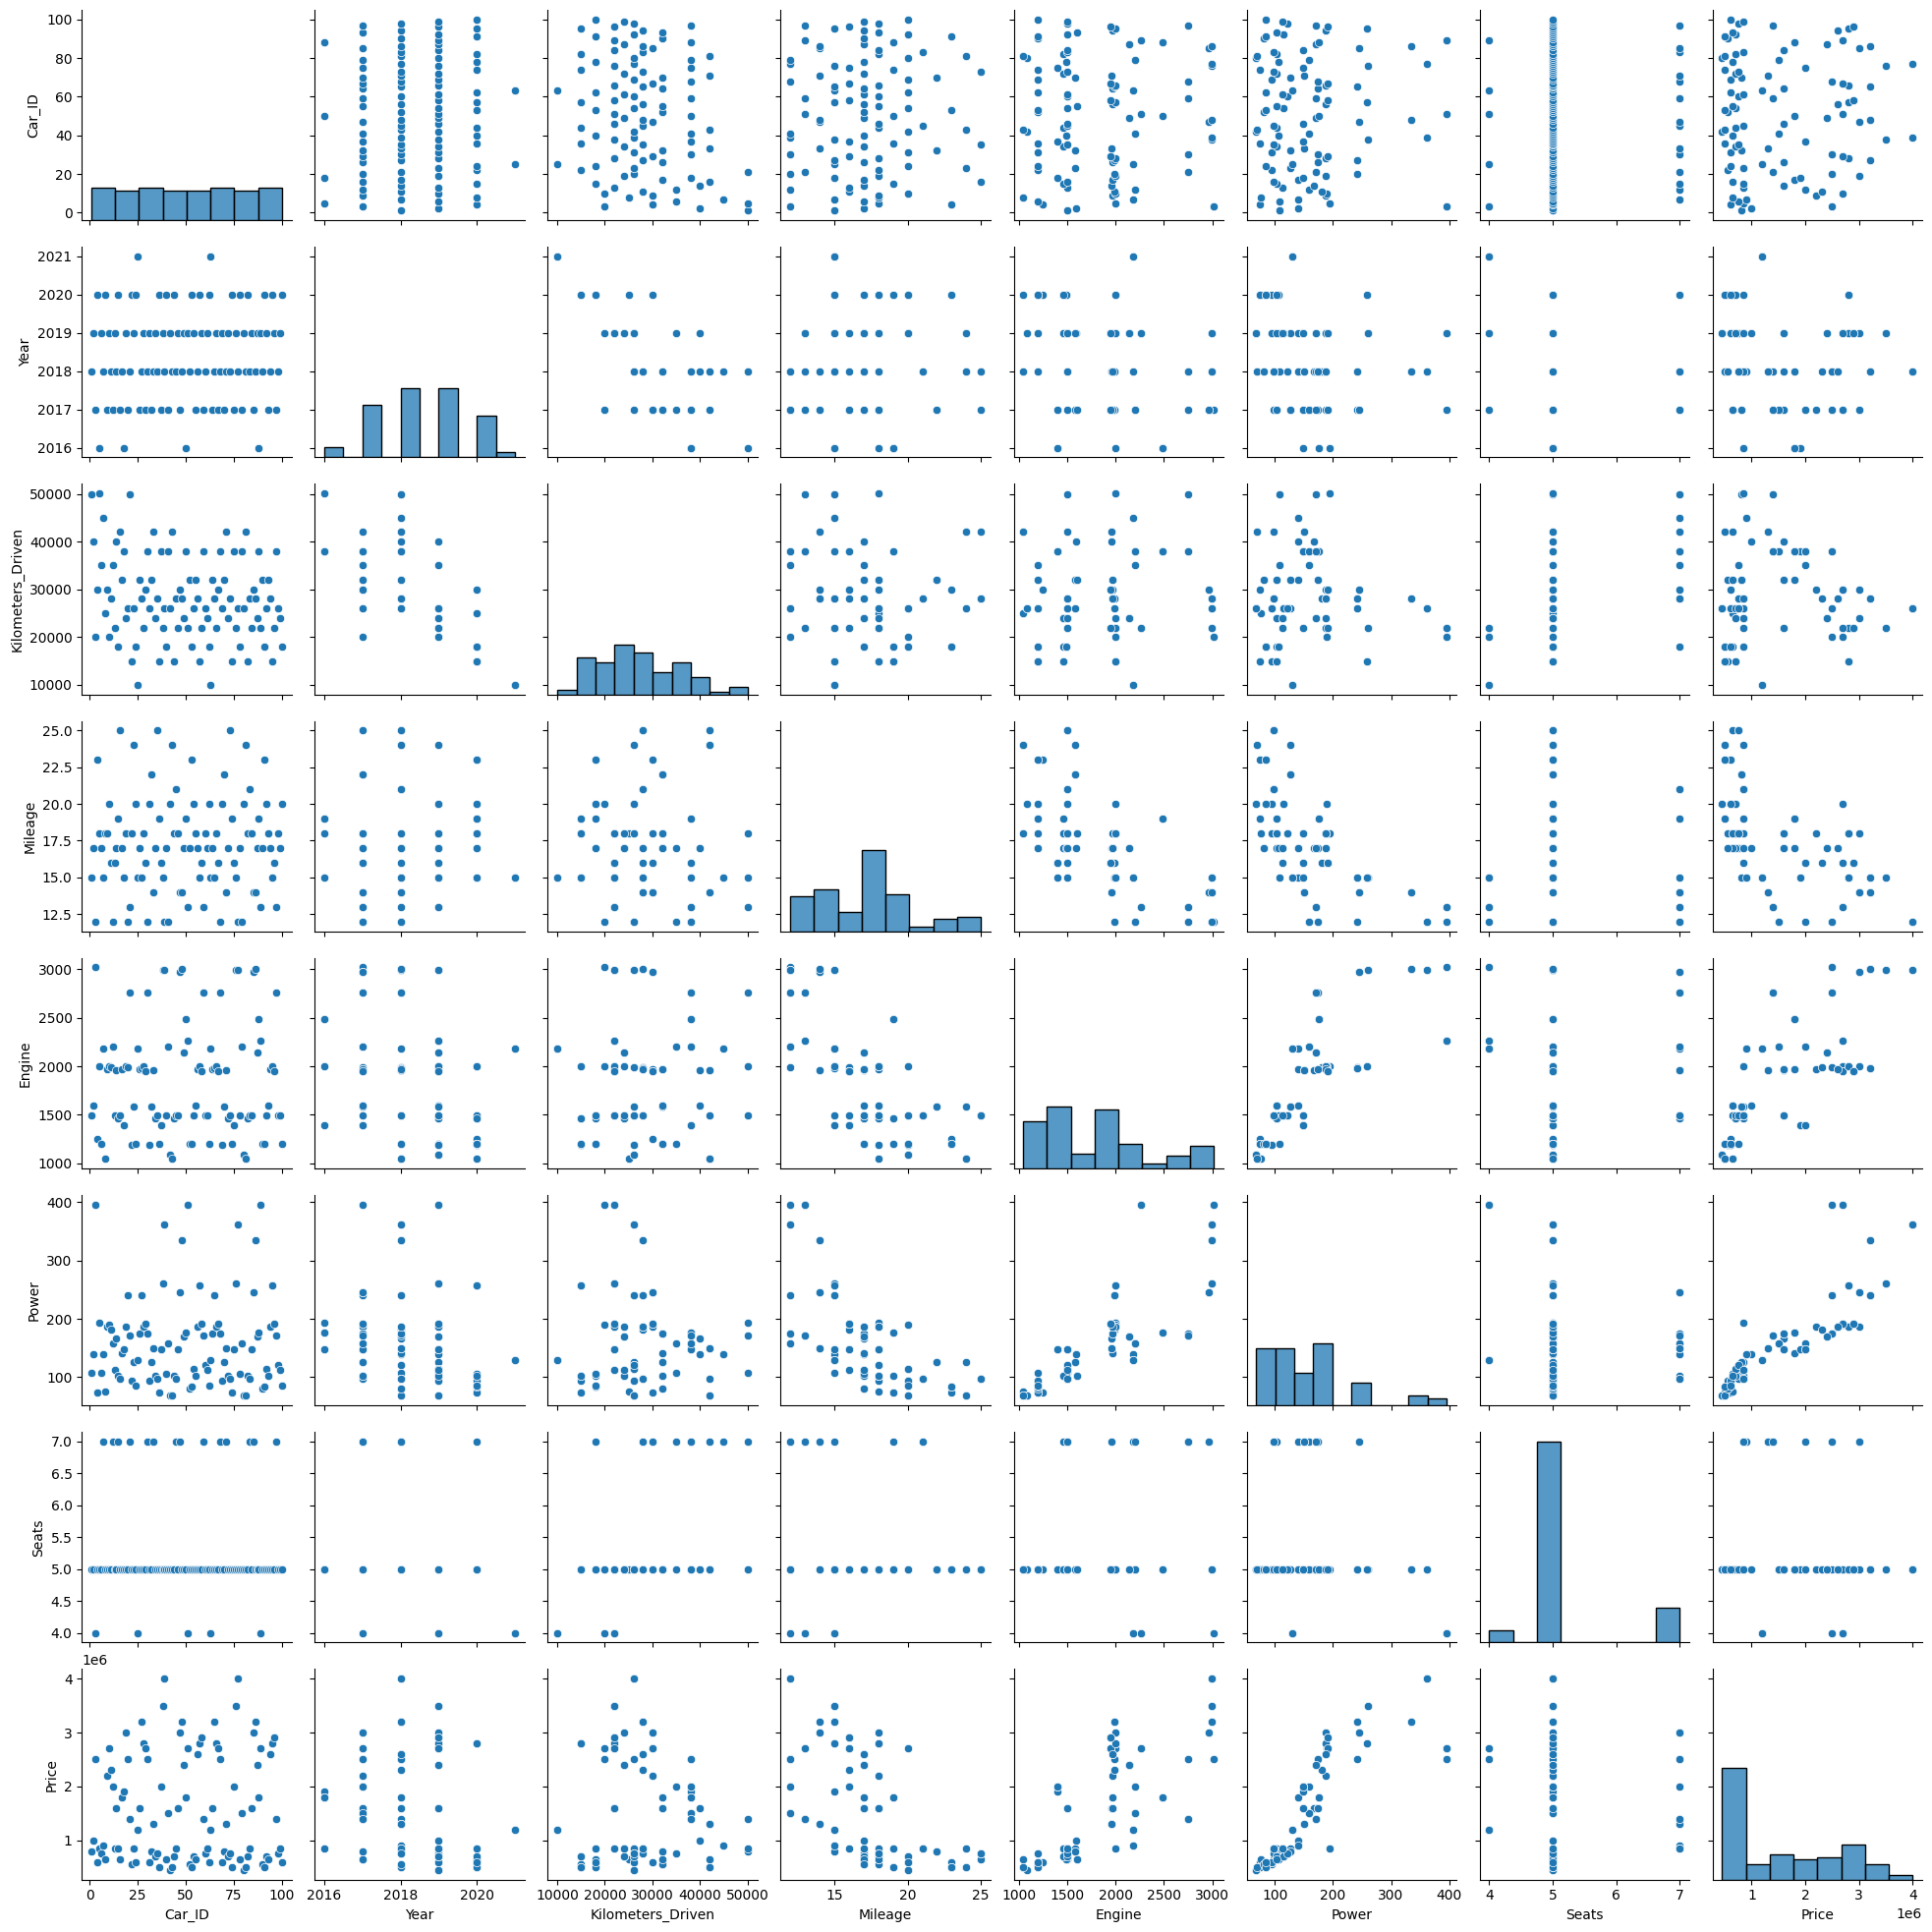

In [154]:
#pairplot
sns.pairplot(df)
plt.show()

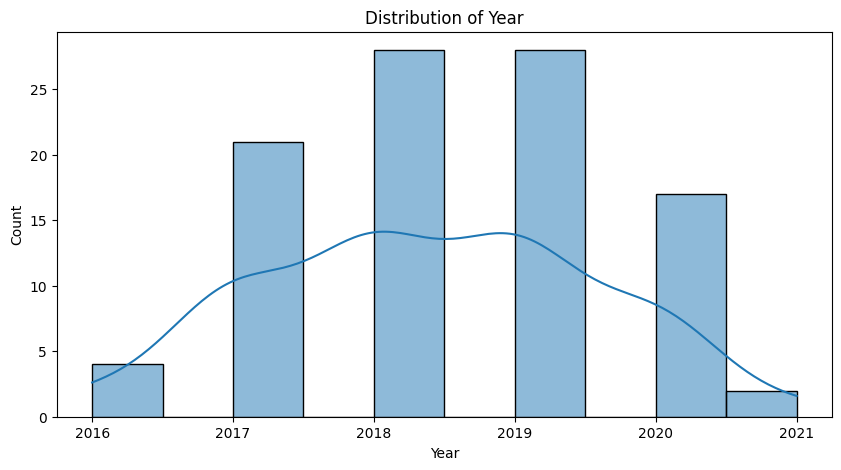

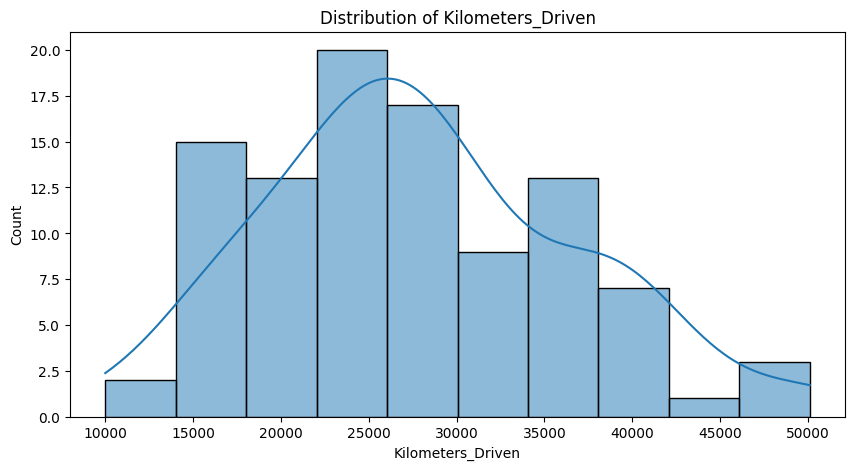

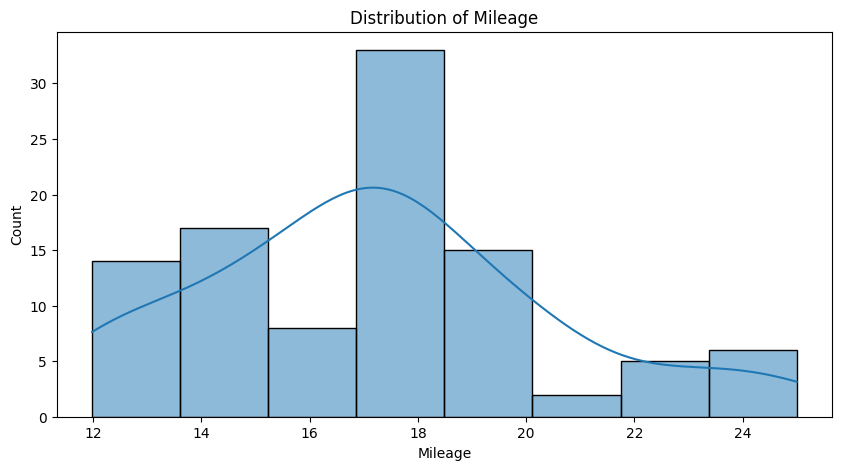

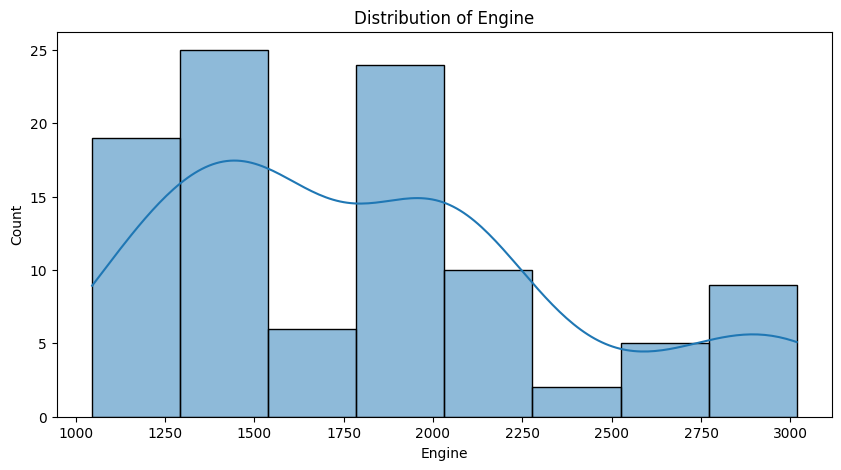

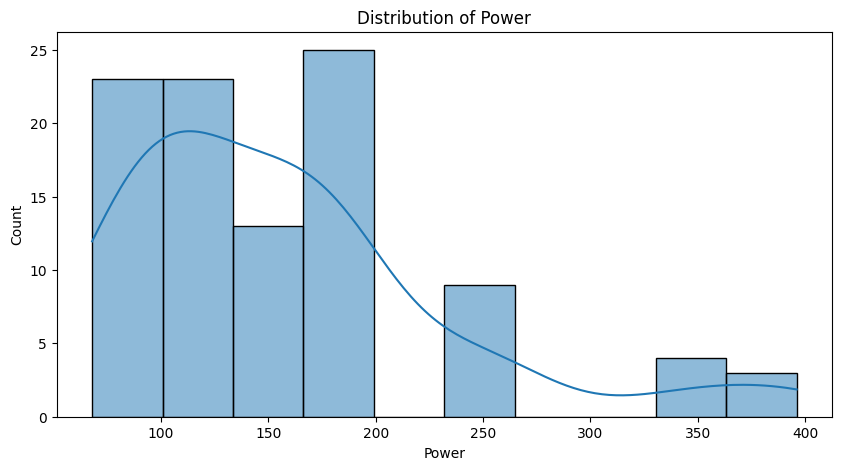

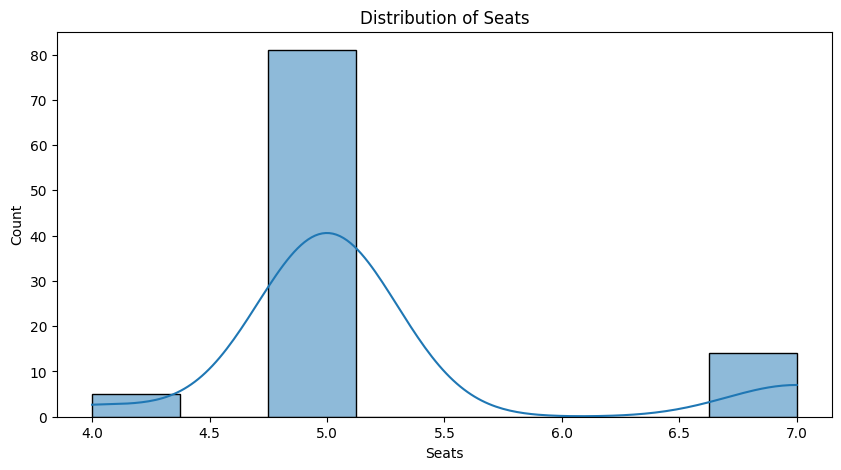

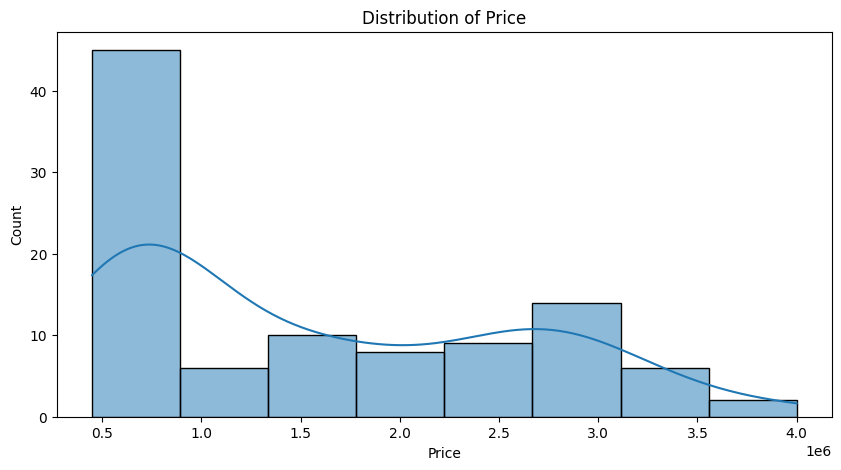

In [155]:
#distribution plots
for column in numerical_features:
    plt.figure(figsize=(10,5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\ffuckan\AppData\Local\Temp\ipykernel_31388\3374415044.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


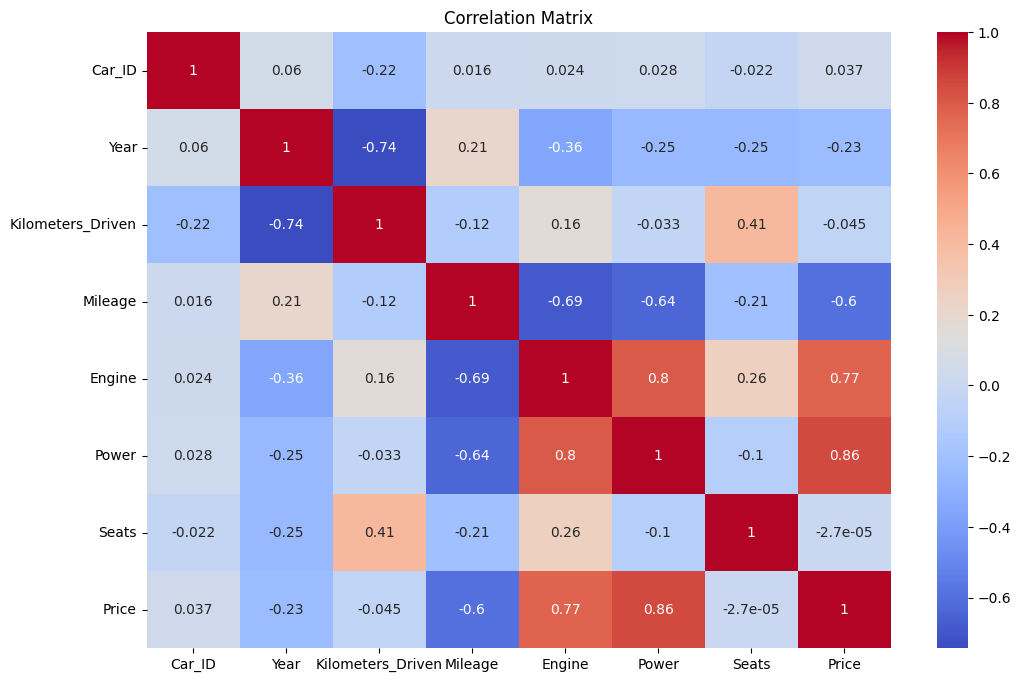

In [156]:
#correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 6. Feature Enginering

In [157]:
df['Car_Age'] = 2024 - df['Year']
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,1,Toyota,Corolla,2018.0,50000.0,Petrol,Manual,First,15.00,1498.00,108.0,5.0,800000.0,6.0
1,2,Honda,Civic,2019.0,40000.0,Petrol,Automatic,Second,17.00,1597.00,140.0,5.0,1000000.0,5.0
2,3,Ford,Mustang,2017.0,20000.0,Petrol,Automatic,First,11.98,3017.53,395.0,4.0,2500000.0,7.0
3,4,Maruti,Swift,2020.0,30000.0,Diesel,Manual,Third,23.00,1248.00,74.0,5.0,600000.0,4.0
4,5,Hyundai,Sonata,2016.0,50100.0,Diesel,Automatic,Second,18.00,1999.00,194.0,5.0,850000.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019.0,22000.0,Diesel,Automatic,First,16.00,1950.00,191.0,5.0,2900000.0,5.0
96,97,Toyota,Innova Crysta,2017.0,38000.0,Diesel,Manual,Second,13.00,2755.00,171.0,7.0,1400000.0,7.0
97,98,Ford,EcoSport,2018.0,26000.0,Petrol,Manual,Third,18.00,1497.00,121.0,5.0,750000.0,6.0
98,99,Hyundai,Verna,2019.0,24000.0,Petrol,Automatic,Second,17.00,1497.00,113.0,5.0,850000.0,5.0


In [158]:
df = df.drop('Year', axis = 1)
df

,Car_ID,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,1,Toyota,Corolla,50000.0,Petrol,Manual,First,15.00,1498.00,108.0,5.0,800000.0,6.0
1,2,Honda,Civic,40000.0,Petrol,Automatic,Second,17.00,1597.00,140.0,5.0,1000000.0,5.0
2,3,Ford,Mustang,20000.0,Petrol,Automatic,First,11.98,3017.53,395.0,4.0,2500000.0,7.0
3,4,Maruti,Swift,30000.0,Diesel,Manual,Third,23.00,1248.00,74.0,5.0,600000.0,4.0
4,5,Hyundai,Sonata,50100.0,Diesel,Automatic,Second,18.00,1999.00,194.0,5.0,850000.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,22000.0,Diesel,Automatic,First,16.00,1950.00,191.0,5.0,2900000.0,5.0
96,97,Toyota,Innova Crysta,38000.0,Diesel,Manual,Second,13.00,2755.00,171.0,7.0,1400000.0,7.0
97,98,Ford,EcoSport,26000.0,Petrol,Manual,Third,18.00,1497.00,121.0,5.0,750000.0,6.0
98,99,Hyundai,Verna,24000.0,Petrol,Automatic,Second,17.00,1497.00,113.0,5.0,850000.0,5.0


### 7. Model Selection

In [159]:
#encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Price', axis = 1)
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [161]:
#initializing models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [162]:
#training the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [163]:
#predicting and evaluating each model
models = {'Linear Regression': lr, 'Random Forrest':rf, 'Gradient Boosting Regressor': gbr}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R_squared: {r2}')

Linear Regression - MSE: 140212827854.6045, R_squared: 0.8285592372016819
Random Forrest - MSE: 139124875000.0, R_squared: 0.8298894968515009
Gradient Boosting Regressor - MSE: 111153840964.81145, R_squared: 0.8640901865075363


In [164]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()

    # Cross-validation R-squared scores
    r2_scores=cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()
    print(f'{name} - Mean MSE: {mean_mse:.4f} (Std: {std_mse:.4f}), Mean R-squared: {mean_r2:.4f} (Std: {std_r2:.4f})')


Linear Regression - Mean MSE: 130030792139.4360 (Std: 41473496345.5118), Mean R-squared: 0.8168 (Std: 0.1301)
Random Forrest - Mean MSE: 76968003125.0000 (Std: 38968603491.5730), Mean R-squared: 0.9016 (Std: 0.0567)
Gradient Boosting Regressor - Mean MSE: 58579503453.0936 (Std: 39595124579.6544), Mean R-squared: 0.9238 (Std: 0.0548)


### 8. Hyperparameter Tuning

In [165]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' :  [2, 5, 10]
}

param_grid_gbr = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [3, 5, 7]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv = 5, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv = 5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_rf.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)

# Best estimators
best_rf = grid_search_rf.best_estimator_
best_gbr = grid_search_gbr.best_estimator_

# Evaluate the tuned models
models = {'Best Random Forest': best_rf, 'Best Gradient Boosting': best_gbr}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R_squared: {r2}')


Best Random Forest - MSE: 142291561111.11115, R_squared: 0.8260175324190119
Best Gradient Boosting - MSE: 109335620757.35129, R_squared: 0.866313357269241
